In [1]:
import matplotlib.pyplot as plt
from ge_2014.simulation.rod_2D_simulation import rod_2D_sources_fc
from ge_2014.simulation.rod_2D_simulation import rod_2D_simulation,rod_2D_simulation_homo
import ge_2014.units.units as units
import meep as mp

In [42]:

resolution = 20
padding = 4.0
nb =1.5
pml_thickness = 1.0/rod_2D_sources_fc
source_width = 6*units.fs #smoothing
nonpml_vol = mp.Volume(mp.Vector3(),size=mp.Vector3(2*padding,2*padding))


In [43]:
sim = rod_2D_simulation(resolution=resolution,
                        padding=padding,
                        pml_thickness=pml_thickness,
                        background_index=nb,
                        source_width=source_width)
sim.init_sim()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000254154 s
Working in 2D dimensions.
Computational cell is 9.45 x 9.45 x 0 with resolution 20
     block, center = (0,0,0)
          size (0.01,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.109291 s
drude susceptibility: frequency=6.68914, gamma=0.0371619
-----------


In [44]:

sim.run(mp.at_every(.1, mp.to_appended('ey_data_tot', mp.output_efield_y)),until_after_sources=300)

/home/maeve/micromamba/envs/nano-cavity/lib/python3.10/site-packages/meep/simulation.py:1344: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)


FloatProgress(value=0.0, description='0% done ', max=317.98754692077637)

creating output file "./ey_data_tot.h5"...
Meep progress: 21.525000000000002/317.98754692077637 = 6.8% done in 4.0s, 55.1s to go
on time step 868 (time=21.7), 0.00461822 s/step
Meep progress: 43.800000000000004/317.98754692077637 = 13.8% done in 8.0s, 50.1s to go
on time step 1760 (time=44), 0.00451233 s/step
Meep progress: 61.6/317.98754692077637 = 19.4% done in 12.0s, 50.0s to go
on time step 2476 (time=61.9), 0.00558921 s/step
Meep progress: 88.60000000000001/317.98754692077637 = 27.9% done in 16.0s, 41.5s to go
on time step 3560 (time=89), 0.00369635 s/step
Meep progress: 107.55000000000001/317.98754692077637 = 33.8% done in 20.0s, 39.2s to go
on time step 4311 (time=107.775), 0.0053277 s/step
Meep progress: 126.22500000000001/317.98754692077637 = 39.7% done in 24.0s, 36.5s to go
on time step 5064 (time=126.6), 0.00532481 s/step
Meep progress: 144.775/317.98754692077637 = 45.5% done in 28.0s, 33.5s to go
on time step 5804 (time=145.1), 0.00541249 s/step
Meep progress: 176.5/317.987

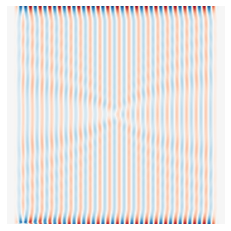

In [18]:
import numpy as np
ey_data = np.real(sim.get_dft_array(dft_obj, mp.Ey, 99))

plt.figure()
plt.imshow(ey_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()

## Look at initial response

FloatProgress(value=0.0, description='0% done ', max=50.0)

     block, center = (0,0,0)
          size (0.01,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


TypeError: meep.geom.Vector3() argument after * must be an iterable, not NoneType

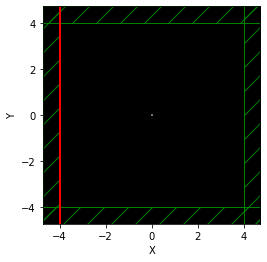

In [16]:
sim.init_sim()
sim.restart_fields()
fig = plt.figure()

animation_x = mp.Animate2D(sim,fields=mp.Ex,f=fig,normalize=True)
animation_y = mp.Animate2D(sim,fields=mp.Ey,f=fig,normalize=True)
animation_z = mp.Animate2D(sim,fields=mp.Ez,f=fig,normalize=True)
sim.run(mp.at_every(.5, animation_x,animation_y,animation_z),until=50)

animation_x.to_gif(20,'rod_sim_x.gif')
animation_y.to_gif(20,'rod_sim_y.gif')
animation_z.to_gif(20,'rod_sim_z.gif')

## Get DFT Fields

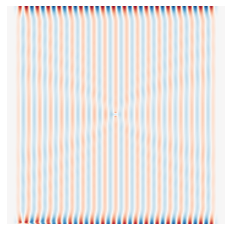

In [44]:
ey_data = np.real(sim.get_dft_array(dft_obj,mp.Ey,50))

plt.figure()
plt.imshow(ey_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()

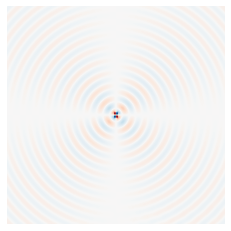

In [25]:
ex_data = np.real(sim.get_dft_array(dft_obj,mp.Ex,0))

plt.figure()
plt.imshow(ex_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()

## Calculation of the scattered field

`Ge, Rong-Chun, and S. Hughes. “Design of an Efficient Single Photon Source from a Metallic Nanorod Dimer: A Quasi-Normal Mode Finite-Difference Time-Domain Approach.” Optics Letters 39, no. 14 (July 15, 2014): 4235. https://doi.org/10.1364/OL.39.004235.
`


The scattered field will contain resonnt responses of the system . We define the total field $E^{tot}(\omega)$(which contains the incident and source). Then the scattered field is 

$$E^S(\omega)=E^{tot}(\omega) - E^h(\omega)$$

Where $E^h(\omega)$ contains the homogeneous solution without the metalic nano particle (MNP) (i.e. no scattering).



### Homogeneous Field

We compute the field without a MNP.


In [39]:
sim_homo = rod_2D_simulation_homo(resolution=resolution,
                        padding=padding,
                        pml_thickness=pml_thickness,
                        background_index=nb,
                        source_width=source_width)
sim_homo.init_sim()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000243902 s
Working in 2D dimensions.
Computational cell is 9.45 x 9.45 x 0 with resolution 20
time for set_epsilon = 0.118227 s
-----------


In [41]:
sim_homo.run(mp.at_every(.1, mp.to_appended('ey_data', mp.output_efield_y)),until_after_sources=300)

FloatProgress(value=0.0, description='0% done ', max=317.98754692077637)

creating output file "./ey_data.h5"...
Meep progress: 24.900000000000002/317.98754692077637 = 7.8% done in 4.0s, 47.1s to go
on time step 1000 (time=25), 0.00400386 s/step
Meep progress: 47.900000000000006/317.98754692077637 = 15.1% done in 8.0s, 45.1s to go
on time step 1920 (time=48), 0.00435996 s/step
Meep progress: 68.5/317.98754692077637 = 21.5% done in 12.0s, 43.8s to go
on time step 2744 (time=68.6), 0.00486746 s/step
Meep progress: 88.10000000000001/317.98754692077637 = 27.7% done in 16.0s, 41.8s to go
on time step 3532 (time=88.3), 0.00508713 s/step
Meep progress: 117.0/317.98754692077637 = 36.8% done in 20.0s, 34.4s to go
on time step 4692 (time=117.3), 0.003451 s/step
Meep progress: 139.3/317.98754692077637 = 43.8% done in 24.0s, 30.8s to go
on time step 5580 (time=139.5), 0.00451558 s/step
Meep progress: 161.4/317.98754692077637 = 50.8% done in 28.0s, 27.2s to go
on time step 6464 (time=161.6), 0.00452888 s/step
Meep progress: 183.20000000000002/317.98754692077637 = 57.6% d


Field time usage:
        connecting chunks: 0.0193288 s
            time stepping: 8.31217 s
       copying boundaries: 2.23293 s
    all-all communication: 0.00451183 s
        1-1 communication: 0.0499043 s
     Fourier transforming: 17.5977 s
          everything else: 1114.5 s
         updating B field: 2.04279 s
         updating H field: 0.0694683 s
         updating D field: 2.42552 s
         updating E field: 3.40916 s
      boundary stepping B: 0.0398891 s
     boundary stepping WH: 0.0116034 s
     boundary stepping PH: 0.0106196 s
      boundary stepping H: 0.402652 s
      boundary stepping D: 0.800345 s
     boundary stepping WE: 0.029578 s
     boundary stepping PE: 0.0111177 s
      boundary stepping E: 0.78863 s



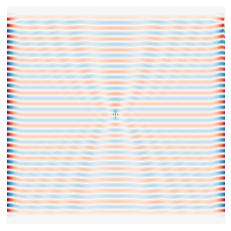

In [35]:
ey_total = sim.get_dft_array(dft_obj,mp.Ey,50)
ey_homo = sim_homo.get_dft_array(dft_homo_obj,mp.Ey,50)
sim_homo.print_times()

plt.figure()
plt.imshow(np.real(ey_total-ey_homo), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()

### Large losses and special care

A common method to obtain the scattered field is to just apply a dipole excitation source and to Fourier transform the scattered field after the source has gone away. 

For metal though, the dipole source does not efficiently excite the QNM because of large losses.

In [46]:
import h5py

f_homo = h5py.File('ey_data.h5')
f_total = h5py.File('ey_data_tot.h5')


/home/maeve/micromamba/envs/nano-cavity/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/maeve/micromamba/envs/nano-cavity/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [50]:
dscattered = f_total['ey'][:,:,:]-f_homo['ey'][:,:,:]

In [52]:
dscattered.shape

(189, 189, 3180)

/tmp/ipykernel_47736/1858437495.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


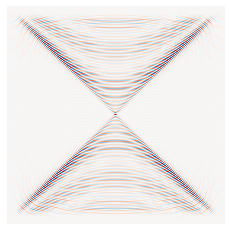

In [70]:

plt.figure()

plt.axis("off")
plt.show()

In [1]:
import ge_2014.qnm.qnm_integration as qnmi
from pathlib import Path

file_homo = Path('output_homo.h5')
file_total = Path('output_total.h5')
file_scattered = Path('output_scattered.h5')



qnmi.make_sample_homo(time_after=10,output_homo=file_homo)
qnmi.make_sample_total(time_after=10,output_total=file_total)
qnmi.output_scattered(file_total,file_homo,file_scattered)



-----------
Initializing structure...
time for choose_chunkdivision = 0.000128031 s
Working in 2D dimensions.
Computational cell is 9.45 x 9.45 x 0 with resolution 20
time for set_epsilon = 0.073756 s
-----------


FloatProgress(value=0.0, description='0% done ', max=27.987546920776367)

creating output file "./output_homo.h5"...
Meep progress: 14.675/27.987546920776367 = 52.4% done in 4.0s, 3.6s to go
on time step 588 (time=14.7), 0.00681891 s/step


run 0 finished at t = 28.0 (1120 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000205994 s
Working in 2D dimensions.
Computational cell is 9.45 x 9.45 x 0 with resolution 20
     block, center = (0,0,0)
          size (0.01,0.08,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0963161 s
drude susceptibility: frequency=6.68914, gamma=0.0371619
-----------


/home/maeve/micromamba/envs/nano-cavity/lib/python3.10/site-packages/meep/simulation.py:1344: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)


FloatProgress(value=0.0, description='0% done ', max=27.987546920776367)

creating output file "./output_total.h5"...
Meep progress: 16.0/27.987546920776367 = 57.2% done in 4.0s, 3.0s to go
on time step 644 (time=16.1), 0.00623569 s/step
Meep progress: 28.0/27.987546920776367 = 100.0% done in 8.0s, -0.0s to go
run 0 finished at t = 28.0 (1120 timesteps)


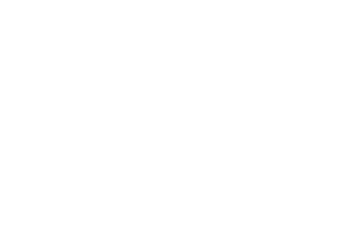

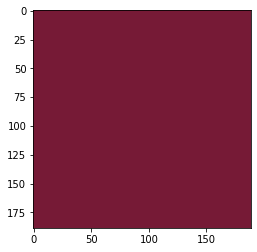

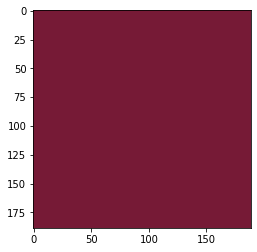

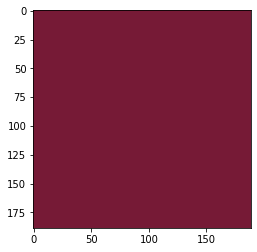

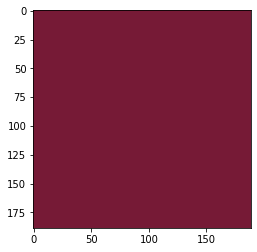

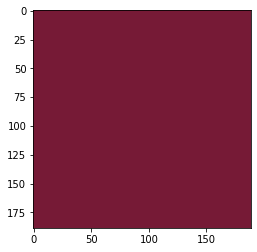

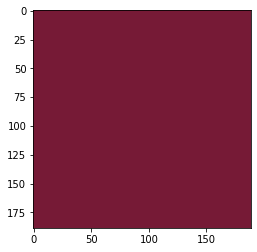

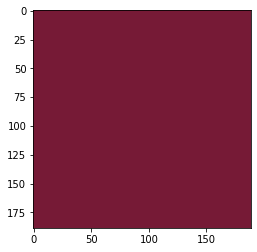

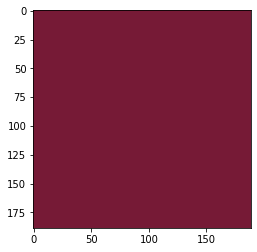

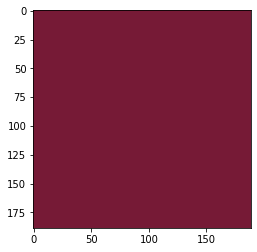

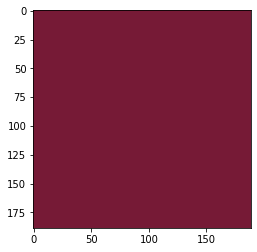

In [81]:
import ge_2014.plot_utils.animation as anim
from pathlib import Path
path_homo = Path('img_homo/')
path_homo.mkdir(exist_ok=True)
path_total = Path('img_total/')
path_total.mkdir(exist_ok=True)
path_scattered=Path('img_scattered/')
path_scattered.mkdir(exist_ok=True)


anim.h5_time_series_png(file_homo,output_folder=path_homo)
anim.h5_time_series_png(file_total,output_folder=path_total)
anim.h5_time_series_png(file_homo,output_folder=path_scattered)

In [68]:
from IPython.display import Video

Video(filename='writer_test.mp4')